## Make these plots more deployable for a presentation

In [1]:
import os
notebook_wd = os.getcwd()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

os.chdir(os.path.join(notebook_wd, '..'))
from src.d00_utils.conf_utils import *

In [7]:
compounds, water = load_compounds()
params = load_experiments(['pyr_evap_nh42so4'])
constants = load_constants()
exp_vial_droplet

{'pyr_evap_nh42so4': {'paths': {'raw_data': '190918-butenedial-ammonium-sulfate-droplets.csv',
   'cleaned_data': '191007-butenedial-ammonium-sulfate-droplets-CLEANED.csv',
   'processed_data': '191007-butenedial-ammonium-sulfate-droplets-PROCESSED.csv',
   'clustered_data': '190930-butenedial-ammonium-sulfate-droplets-CLUSTERED.csv'},
  'experimental': {'composition': {'Butenedial': '0.75*0.07',
    'PEG-6': 0.2,
    'NH42SO4': '0.03*3'}},
  'processing': {'solution_comp': ['bd07hg20as03'],
   'bad_idx': None,
   'idx_range': [53, 77],
   'trap_time': None,
   'other_query': 'vial>800 and comptype=="bd07hg20as03" and p283>5000',
   'y_col': 'mz84_mz283',
   'columns_to_keep': ['trapped', 'comp', 'vial', 'mz84_mz283', 'mz85_mz283']},
  'plot': {'ylabel': 'Normalized signal',
   'y_col': ['mz84_mz283'],
   'x_col': 'hrs',
   'xlabel': 'Time (hrs)',
   'series_title': 'None',
   'series_color': ['green']}}}

In [8]:
paths = params['pyr_evap_nh42so4']['paths']

In [9]:
from src.d01_data.clean_ms_data import *
from src.d01_data.process_ms_data import *

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df_cleaned = import_ms_data(paths['cleaned_data'])
df_cleaned.head()

,mins,solution_name,vial,mz84_mz283,mz85_mz283
0,118.0,bd07hg20as03_018,886.0,0.016441,0.008400
1,68.0,bd07hg20as03_018,1027.0,0.029026,0.011829
2,21.0,bd07hg20as03_018,1102.0,0.031435,0.014454
3,21.0,bd07hg20as03_018,1127.0,0.033464,0.015761
4,119.0,bd07hg20as03_018,1151.0,0.022317,0.009138


In [12]:
df_processed = process_ms_data_in_pyrrolinone_evap_experiments(paths['cleaned_data'], save_processed_data=True)

In [13]:
df_processed.solution_name

0     bd07hg20as03_018
1     bd07hg20as03_018
2     bd07hg20as03_018
3     bd07hg20as03_018
4     bd07hg20as03_018
5     bd07hg20as03_018
6     bd07hg20as03_019
7     bd07hg20as03_019
9     bd07hg20as03_019
10    bd07hg20as03_019
11    bd07hg20as03_019
12    bd07hg20as03_019
14    bd07hg20as03_020
15    bd07hg20as03_020
17    bd07hg20as03_021
19    bd07hg20as03_022
20    bd07hg20as03_022
21    bd07hg20as03_022
23    bd07hg20as03_022
24    bd07hg20as03_022
Name: solution_name, dtype: object

In [15]:
from src.d03_modeling.perform_ols import *
df_mod = create_ordinary_least_squares_data(paths['clustered_data'], x_col_name='hrs', y_col_name='mz84_mz283',
                                        take_log=True, save_data=False)
df_mod.head()

,hrs,mz84_mz283,score,tau
0,0.103333,0.030251,0.852499,3.189017
1,0.128552,0.030013,0.852499,3.189017
2,0.153771,0.029777,0.852499,3.189017
3,0.178990,0.029542,0.852499,3.189017
4,0.204209,0.029309,0.852499,3.189017


In [16]:
df_clustered = import_ms_data(paths['clustered_data'])
df_clustered

,mz84_mz283,hrs,mz84_mz283_std,hrs_std,experiment
0,0.023115,0.958333,0.008359,2.474874e-01,pyr_nh42so4
1,0.025233,0.103333,0.007987,3.990730e-02,pyr_nh42so4
2,0.018427,1.925000,0.005102,9.477068e-02,pyr_nh42so4
3,0.012860,2.600000,NaN,NaN,pyr_nh42so4
4,0.033499,0.350000,0.002082,1.493814e-09,pyr_nh42so4


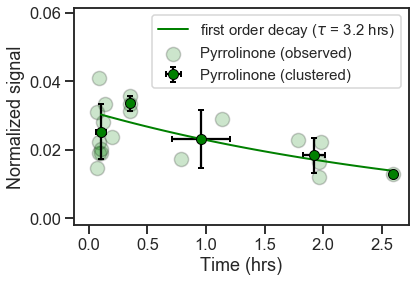

In [17]:
from src.d05_reporting.plot_ms_data import plot_ms_data
plot_ms_data(df_data=df_processed, x_data_col='hrs', y_data_cols=['mz84_mz283'],
             series_labels=['Pyrrolinone'], series_colors=['Green'], save_fig=False, ax=None,
             df_model=df_mod, x_model_col='hrs', y_model_cols=['mz84_mz283'], 
             model_label='first order decay ($\\tau$ = %.1f hrs)' % df_mod.tau[0],
             df_cluster=df_clustered, x_cluster_col='hrs', y_cluster_cols=['mz84_mz283'],
             x_label='%s' % 'hrs', y_label='Normalized signal', series_title=None)